 ## Connect to a PostgreSQL Database Server

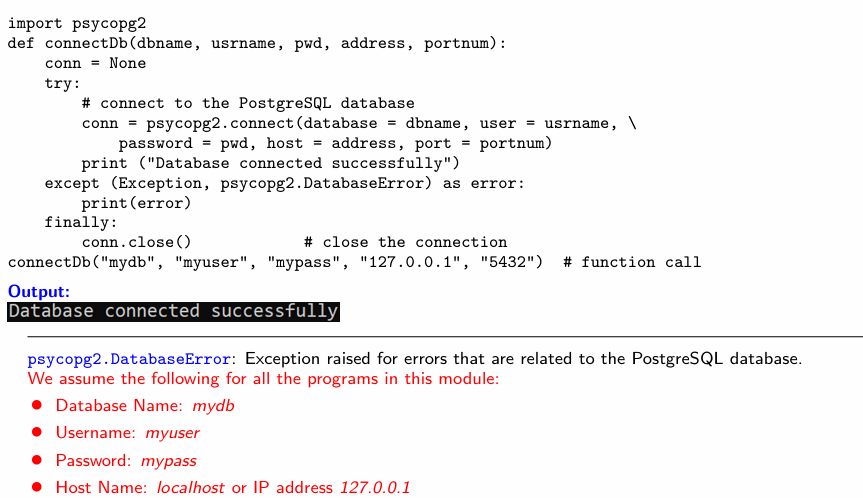


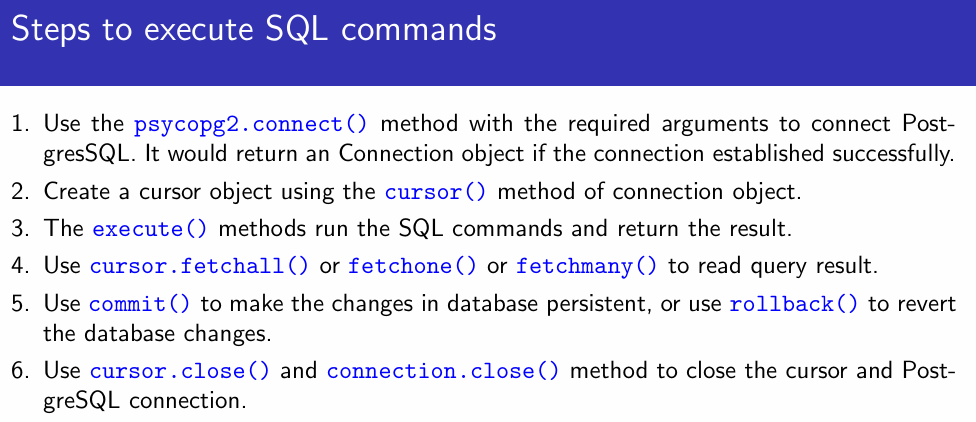


In [32]:
import psycopg2
conn=None

conn=psycopg2.connect(database='lisdb', user='postgres',password='piyush12345',host='127.0.0.1',port='5433')
print("Database connected succesfully")
cur = conn.cursor()
query = "Select * from quota"
cur.execute(query)
result = cur.fetchall()
print(result)
for i in result:
    print(i[0])
conn.commit()
if conn is not None:
    conn.close()

Database connected succesfully
[('UG', 10, 20), ('PG', 12, 24), ('FC', 15, 30), ('RS', 15, 30)]
UG
PG
FC
RS


In [31]:
import psycopg2

def connectDb(dbname, usrname, pwd, address, portnum):
    conn = None
    try:
        # Connect to the PostgreSQL database
        conn = psycopg2.connect(database=dbname, user=usrname,
                                password=pwd, host=address, port=portnum)
        print("Database connected successfully")
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()  # Close the connection

# Function call with the correct credentials
connectDb("lisdb", "postgres", "piyush12345", "127.0.0.1", "5433")


invalid dsn: invalid connection option "Database"



## Create a new table
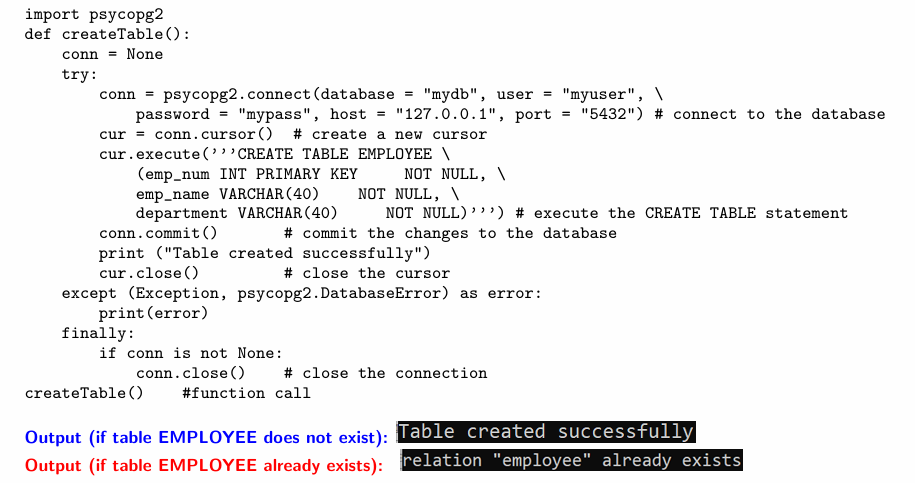

In [46]:
import psycopg2
conn=None
try:
    conn=psycopg2.connect(database='demo',user='postgres',password='piyush12345',host='127.0.0.1',port='5433')
    print("Database connected succesfully")
    cur = conn.cursor()
    query = " create table week71 (name varchar(10) primary key, assignment varchar(10), marks int)"
    cur.execute(query)
    conn.commit()
    print('Table created succesfully')
    cur.close()
    
except(Exception,psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

Database connected succesfully
Table created succesfully


## Solution for Practice Q4

In [6]:
import sys
import os
import psycopg2

file = open("team.txt", "r")
x = file.read()
try:
    connection = psycopg2.connect(
        database = sys.argv[1],
        user = os.environ.get('PGUSER'),
        password = os.environ.get('PGPASSWORD'),
        host = os.environ.get('PGHOST'),
        port = os.environ.get('PGPORT'))
    cursor = connection.cursor()
    query = "select playground from teams where team_id  = '{}'".format(x)
    cursor.execute(query)
    result = cursor.fetchall()
    for i in result:
        print(i[0])
    cursor.close()
except(Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    connection.close()

FileNotFoundError: [Errno 2] No such file or directory: 'team.txt'

## Solution for practice Q1

In [ ]:
import sys
import os
import psycopg2

def isprime(n):
    count = 0
    for i in range(1, n+1):
        if (n % i == 0):
            count = count + 1
    if(count ==2):
        return True
    else:
        return False


try:
    connection = psycopg2.connect(
        database = sys.argv[1],
        user = os.environ.get('PGUSER'),
        password = os.environ.get('PGPASSWORD'),
        host = os.environ.get('PGHOST'),
        port = os.environ.get('PGPORT'))
    cursor = connection.cursor()
    query = "select p.name, t.name, p.jersey_no from teams t join players p on p.team_id = t.team_id order by p.name desc, t.name desc"
    cursor.execute(query)
    result = cursor.fetchall()
    for res in result:
        jno = res[2]
        if isprime(jno):
            print(res[0] + ", " + res[1])
    cursor.close()
except(Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    connection.close()

In [53]:

x = 2
age = 21
# % operator, %s for string, %d for integer/numeric
z = "select * from teams where team_id= %d" %x
print(z)

# str.format()

z1 = "select * from teams where team_id= '{}' and age = {}".format(x,age)
print(z1)

# f string

z2 = f"select * from teams where team_id= '{x}' and age = {age}"
print(z2)


select * from teams where team_id= 2
select * from teams where team_id= '2' and age = 21
select * from teams where team_id= '2' and age = 21
